In [1]:
# Packages
import tqdm
import numpy as np 
import matplotlib.pyplot as plt 
from src.utils import * 
from src.plot import ellipses

In [2]:
# Data
x = np.loadtxt('data/data.txt')

In [3]:
# Parameters
t = 1
k = 5
dim = 2

In [4]:
# Init parameters
np.random.seed(20204834)     
pi = np.random.dirichlet(np.ones(k))     
mu = mean(x,k)
sigma = [np.diag(np.random.rand(dim)) for _ in range(k)] 

Init Likelihood: -7.7034
Epoch 1, Log Likelihood: -2.7608
Epoch 2, Log Likelihood: -2.5755
Epoch 3, Log Likelihood: -2.4873
Epoch 4, Log Likelihood: -2.4297
Epoch 5, Log Likelihood: -2.3606
Epoch 6, Log Likelihood: -2.2514
Epoch 7, Log Likelihood: -2.2174
Epoch 8, Log Likelihood: -2.2174
Epoch 9, Log Likelihood: -2.2174
Epoch 10, Log Likelihood: -2.2174
Epoch 11, Log Likelihood: -2.2174
Epoch 12, Log Likelihood: -2.2174
Epoch 13, Log Likelihood: -2.2174
Epoch 14, Log Likelihood: -2.2174
Epoch 15, Log Likelihood: -2.2174
Epoch 16, Log Likelihood: -2.2174
Epoch 17, Log Likelihood: -2.2174
Epoch 18, Log Likelihood: -2.2174
Epoch 19, Log Likelihood: -2.2174
Epoch 20, Log Likelihood: -2.2174


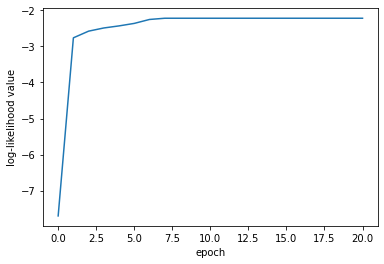

In [5]:
# Test
r = response(x, pi, mu, sigma)
likelihood_list = []
likelihood = log_likelihood(x, pi, mu, sigma)
print('Init Likelihood: {:.4f}'.format(likelihood))
likelihood_list.append(likelihood)
for epoch in range(20):
    r = response(x, pi, mu, sigma)
    pi = update_pi(r)
    mu = update_mu(x, r)
    sigma = update_sigma(x, r, mu)
    likelihood = log_likelihood(x, pi, mu, sigma)
    print('Epoch {}, Log Likelihood: {:.4f}'.format(epoch + 1, likelihood))
    likelihood_list.append(likelihood)

plt.xlabel('epoch')
plt.ylabel('log-likelihood value')
plt.plot(likelihood_list)
plt.show()

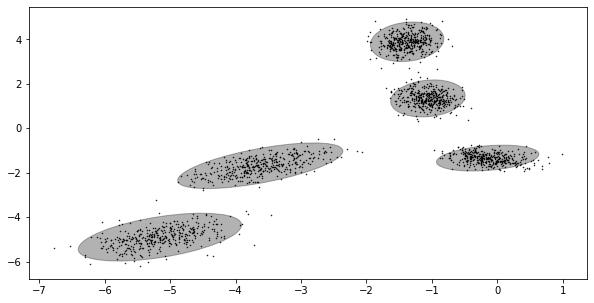

In [6]:
# Plot result
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.scatter(x=x[:, 0], y=x[:, 1], s=1, marker='.', color='black')
for i in range(k):
    ellipses(ax, mu[i], sigma[i], color='black')
plt.show()